# LEGO Dataset Analysis

<img src='assets/bricks.jpg'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore the colors.csv file

In [2]:
colors_df = pd.read_csv('data/colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
colors_df.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

In [4]:
colors_df['name'].unique()

array(['Unknown', 'Black', 'Blue', 'Green', 'Dark Turquoise', 'Red',
       'Dark Pink', 'Brown', 'Light Gray', 'Dark Gray', 'Light Blue',
       'Bright Green', 'Light Turquoise', 'Salmon', 'Pink', 'Yellow',
       'White', 'Light Green', 'Light Yellow', 'Tan', 'Light Violet',
       'Glow In Dark Opaque', 'Purple', 'Dark Blue-Violet', 'Orange',
       'Magenta', 'Lime', 'Dark Tan', 'Bright Pink', 'Medium Lavender',
       'Lavender', 'Trans-Black IR Lens', 'Trans-Dark Blue',
       'Trans-Green', 'Trans-Bright Green', 'Trans-Red', 'Trans-Black',
       'Trans-Light Blue', 'Trans-Neon Green', 'Trans-Very Lt Blue',
       'Trans-Dark Pink', 'Trans-Yellow', 'Trans-Clear', 'Trans-Purple',
       'Trans-Neon Yellow', 'Trans-Neon Orange', 'Chrome Antique Brass',
       'Chrome Blue', 'Chrome Green', 'Chrome Pink', 'Chrome Black',
       'Very Light Orange', 'Light Purple', 'Reddish Brown',
       'Light Bluish Gray', 'Dark Bluish Gray', 'Medium Blue',
       'Medium Green', 'Speckle Black-

Use `.nunique()` to find the number of unique color.

In [5]:
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In the `is_trans` column, find how many colors are transparent and how many are not. We can achieve this by calling `.value_counts()` on the column.

In [6]:
colors_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [7]:
colors_df.shape

(135, 4)

## Understanding LEGO THEMES and LEGO SETS
Walk into a LEGO store and you will find their products are organised by themes. Their themes include Batman, Star Wars, Harry Potter and many more.

<img src='assets/lego_themes.png'>

A LEGO Set is a particular box of LEGO or product. A single theme can have many different sets.

<img src='assets/lego_sets.png'>

## Explore the sets.csv

In [8]:
sets_df = pd.read_csv('data/sets.csv')
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets_df.shape

(15710, 5)

To find the year when LEGO launched their first products, we find the smallest value in the `year` column. We find out that 1949 is the answer.

Next, we want to know how many different sets they sold in their first year. To achieve this, we will tell our DataFrame to only return the rows that meet this condition `sets_df['year'] == 1949`.

In [10]:
sets_df['year'].min()

1949

In [11]:
sets_df[sets_df['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Below are two ways that you can find the top n largest values in a specific column.

In [12]:
sets_df['num_parts'].nlargest(5)

15004    9987
11183    7541
10551    6020
295      5923
221      5922
Name: num_parts, dtype: int64

In [13]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [14]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year.head()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28


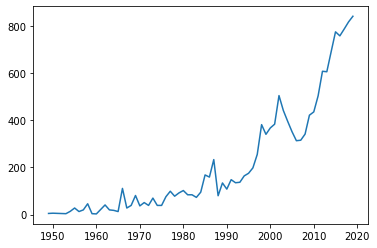

In [15]:
plt.plot(sets_by_year['set_num'][:-2])
plt.show()

## How to use the Pandas's .agg() function

Often you find yourself needing to summarise data. This is where the `.groupby()` function comes in really handy. However, sometimes you want to run even more operations based on a particular DataFrame column. This is where the `.agg()` method comes in.

In our case, we want to calculate the number of different themes by calendar year. This means we have to group the data by year and then count the number of unique theme_ids for that year.

In [16]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


Note, the `.agg()` method takes a dictionary as an argument. In this dictionary, we specify which operation we'd like to apply to each column. In our case, we just want to calculate the number of unique entries in the theme_id column by using our old friend, the `.nunique()` method.

Now let's rename our column to a more appropriate name

In [17]:
themes_by_year.rename(columns={'theme_id': 'num_of_themes'}, inplace=True)
themes_by_year.head()

,num_of_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [18]:
themes_by_year.tail()

,num_of_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


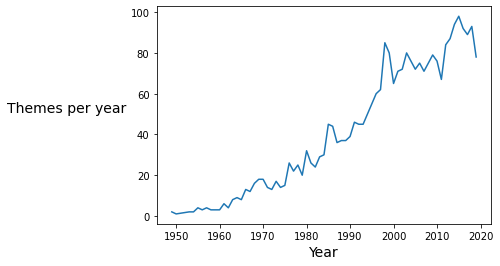

In [19]:
plt.xlabel('Year', fontsize=14)
plt.ylabel('Themes per year', fontsize=14, rotation='horizontal', ha='right')
plt.plot(themes_by_year['num_of_themes'][:-2])
plt.show()

## Plotting sets and themes on a same graph

Wouldn't it be nice to have the number of themes and the number sets on the same chart? But what do we get if we just plot both of them the way we have before? The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900. So what can we do?

**Two Separate Axes**

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

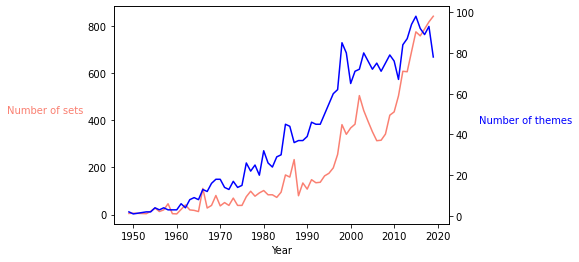

In [20]:
ax1 = plt.gca() # get current axes
ax2 = plt.twinx()

ax1.plot(sets_by_year['set_num'][:-2], c='salmon')
ax2.plot(themes_by_year['num_of_themes'][:-2], c='blue')

ax1.set_ylabel('Number of sets', rotation='horizontal', ha='right', c='salmon')
ax2.set_ylabel('Number of themes', rotation='horizontal', ha='left', c='blue')
ax1.set_xlabel('Year')

plt.show()

We then create another axis object: `ax2`. The key thing is that by using the `.twinx()` method allows `ax1` and `ax2` to share the same x-axis. When we plot our data on the axes objects we get this:

## Calculate number of parts per set

First, let's take a look at the `sets_df` again.

In [21]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


Once again, we're going to use the `.groupby()` and the `.agg()` function together to work this one out. This time we pass a dictionary to the `.agg()` function so that we will target the num_parts column with the `mean()` function. That way, we group our data by year and then we average the number of parts for that year.

In [22]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [23]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


In [24]:
parts_per_set.rename(columns={'num_parts': 'average number of parts'}, inplace=True)
parts_per_set.head()

,average number of parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


To visualise our `parts_per_set` data, let's create a scatter plot. A scatter plot simply uses dots to represent the values of each data point.

## Scatter plot

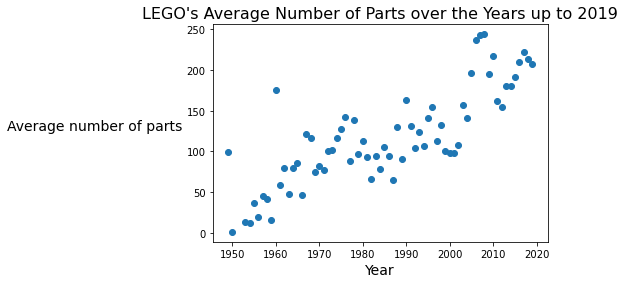

In [25]:
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average number of parts', fontsize=14, rotation='horizontal', ha='right')
plt.title('LEGO\'s Average Number of Parts over the Years up to 2019', fontsize=16)

plt.scatter(parts_per_set.index[:-2], parts_per_set['average number of parts'][:-2])
plt.show()

## Relational Database Schemas

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Is it one of LEGO's own themes like Ninjago or Technic or is it a third party theme? Let's analyse LEGO's product lines in more detail!

Number of Sets per LEGO Theme

To count the number of sets per Theme we can use the `.value_counts()` method on our `theme_id` column. But there's one problem:

In [26]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

We have no idea what our themes are actually called! 🤨 Ok, from the above code, we can see that the theme with id **158** is the largest theme containing **753** individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the `theme_id` from the `themes.csv` file.

<img src='assets/rebrickable_schema.png'>

Understand the theme.csv file

The `themes.csv` file has the actual theme names. How is this table linked to the others tables? Well, the `sets.csv` has `theme_ids` which match the `id` column in the `themes.csv`.

This means that the `theme_id` is the foreign key inside the `sets.csv`. Many different sets can be part of the same theme. But inside the `themes.csv`, each `theme_id`, which is just called `id` is unique. This uniqueness makes the `id` column the primary key inside the `themes.csv`. To see this in action, explore the `themes.csv`.

In [27]:
themes_df = pd.read_csv('data/themes.csv')
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


Search for the name 'Star Wars'. How many ids correspond to the 'Star Wars' name in the `themes.csv`?

In [28]:
themes_df[themes_df['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


From the above output, we see that there are four ids correspond to the name 'Star Wars'. We are going to look up these ids in the `sets.csv` to find their corresponding sets.

In [29]:
sets_df[sets_df['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [30]:
sets_df[sets_df['theme_id'] == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [31]:
sets_df[sets_df['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [32]:
sets_df[sets_df['theme_id'] == 261]

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


Wouldn't it be nice if we could combine our data on theme names with the number of sets per theme? 

Let's use the `.merge()` method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

Currently, our theme_ids and our number of sets per theme live inside a Series called `set_theme_count`.

In [33]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                                'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


## Pandas's .merge() function

To merge two DataFrame along a particular column, we need to provide our `.merge()` function our two DataFrames and the column name on which to merge. This is why we set `on='id'`. Both our `set_theme_count` and our `themes_df` DataFrames have a column with this name.

In [34]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

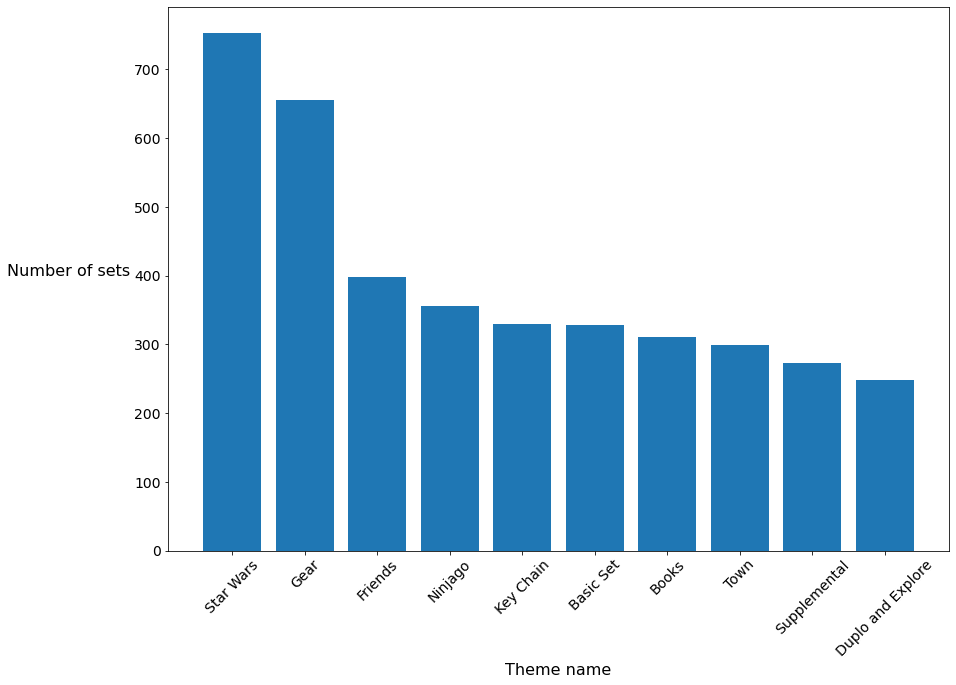

In [37]:
plt.figure(figsize=(14, 10))

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Theme name', fontsize=16)
plt.ylabel('Number of sets', fontsize=16, rotation=0, ha='right')

plt.bar(merged_df.name[:10], merged_df.set_count[:10])